In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Primeira parte exploração de dados
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

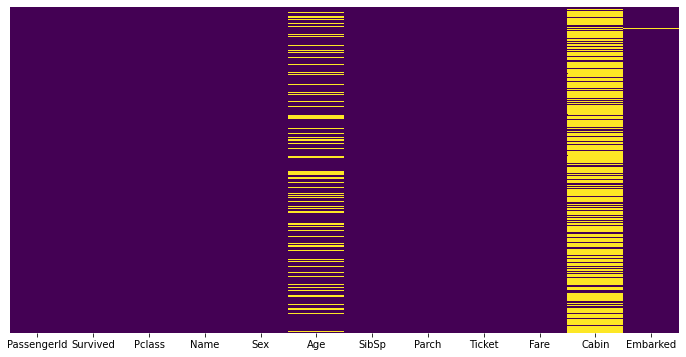

In [5]:
# Usando o heatmap do seaborn para vizualizar os dados nulos
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

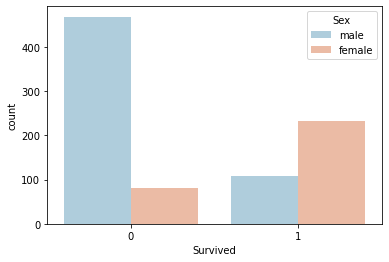

In [6]:
# Plotando os dados Survived X Sex
sns.countplot(x = 'Survived', data = train, hue = 'Sex', palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

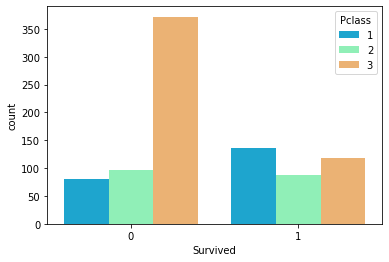

In [7]:
# Plotando os dados Pclass X Survived
sns.countplot(x = 'Survived', data = train, hue = 'Pclass', palette='rainbow')

<AxesSubplot:>

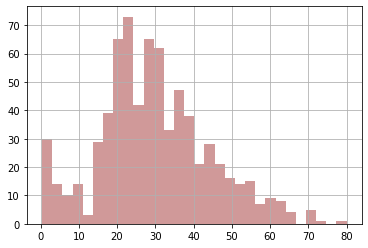

In [8]:
# Plotando a idade das pessoas no titanic
train['Age'].hist(bins = 30,color = 'darkred', alpha = 0.4)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

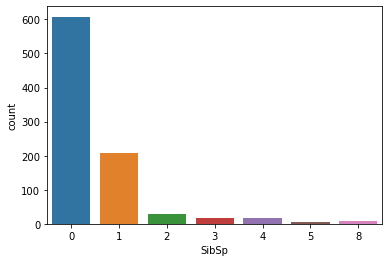

In [9]:
# Dados da quantidade de pessoas acompanhadas
sns.countplot(x = 'SibSp', data = train)

<AxesSubplot:>

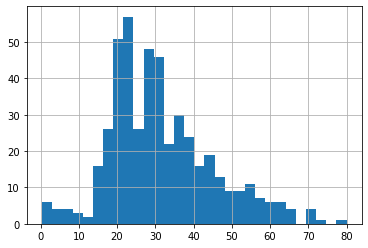

In [10]:
# Vendo a idade das pessoas que não foram acompanhadas
train[train['SibSp'] == 0]['Age'].hist(bins = 30)

<AxesSubplot:>

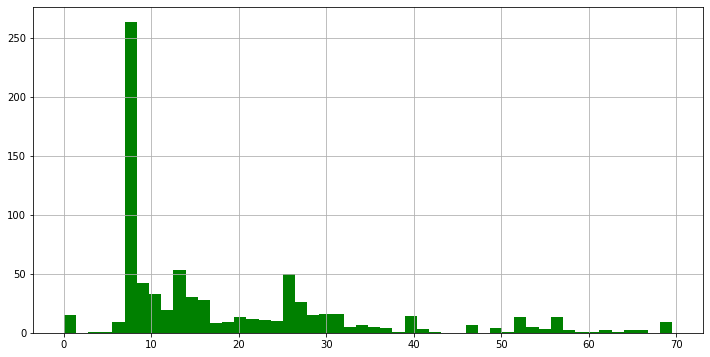

In [11]:
# Vendo as quantidade de pessoas que gastaram menos de 70 pilas 
train[train['Fare'] < 70]['Fare'].hist(color = 'green', bins = 50, figsize = (12, 6))

<AxesSubplot:title={'center':'Pclass X Age'}, xlabel='Pclass', ylabel='Age'>

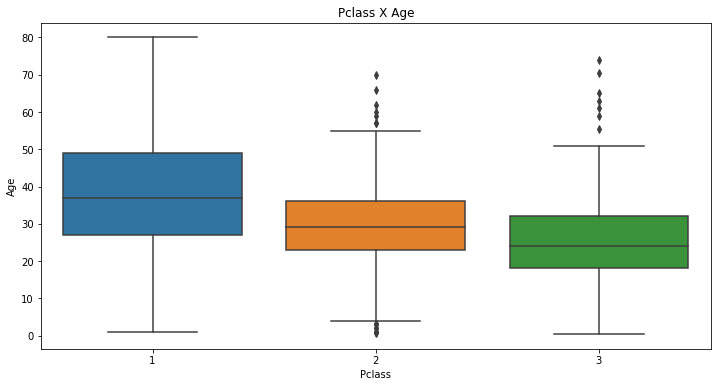

In [12]:
# Tratando os dados 
plt.figure(figsize=(12, 6))
plt.title('Pclass X Age')
sns.boxplot(x = 'Pclass', y = 'Age', data = train)

In [13]:
def inputar_idade(cols):
    Idade = cols[0]
    Classe = cols[1]
    
    if pd.isnull(Idade):
        if Classe == 1:
            return 37
        elif Classe == 2:
            return 29
        else:
            return 24
    else:
        return Idade

In [14]:
train['Age'] = train[['Age', 'Pclass']].apply(inputar_idade, axis = 1)

<AxesSubplot:>

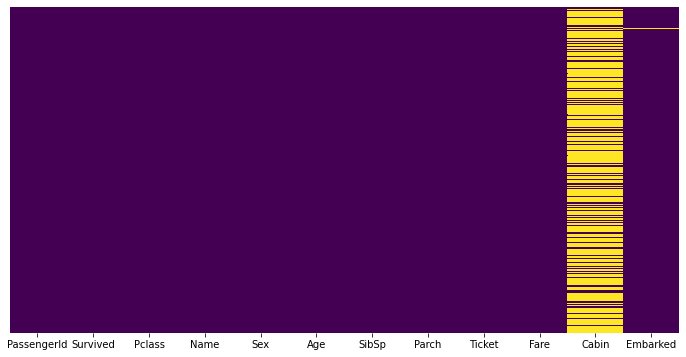

In [15]:
# Dado foi tratado com a média das idades de acordo com a sua classe para não atrapalhar o modelo de machine Learning
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [16]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [17]:
# Como a coluna Cabin tinha muito dados nulos eu preferi retirar ela da base de dados
del train['Cabin']

<AxesSubplot:>

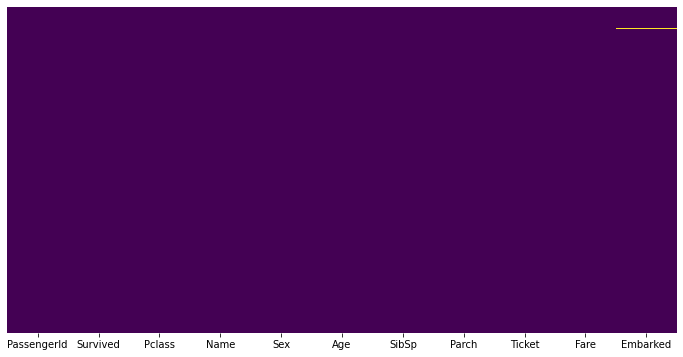

In [18]:
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [19]:
train.dropna(inplace= True)

<AxesSubplot:>

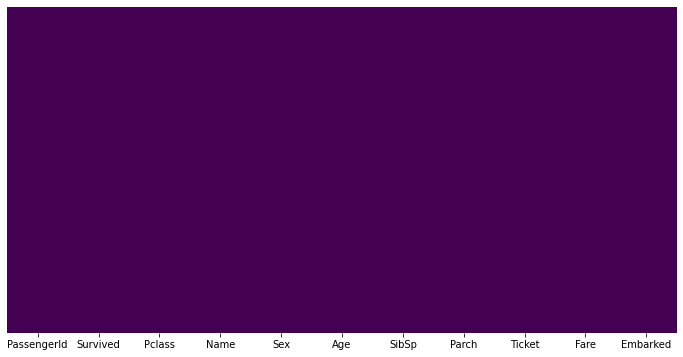

In [20]:
# Sem dados faltantes 
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [21]:
# Tratando dados categóricos
sex = pd.get_dummies(train['Sex'], drop_first= True)

In [22]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [23]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [24]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [25]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [26]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [27]:
# Nesta parte foi retirado as colunas que não são relavntes para o modelo de machine learning 
train.drop(['PassengerId', 'Name', 'Sex', 'Ticket'], axis = 1, inplace= True)

In [28]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,3,22.0,1,0,7.2500,S
1,1,1,38.0,1,0,71.2833,C
2,1,3,26.0,0,0,7.9250,S
3,1,1,35.0,1,0,53.1000,S
4,0,3,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S
887,1,1,19.0,0,0,30.0000,S
888,0,3,24.0,1,2,23.4500,S
889,1,1,26.0,0,0,30.0000,C


In [29]:
# Nesta parte foi feita a concatenação no dataSet
train = pd.concat([train, sex, embark], axis = 1)

In [30]:
del train['Embarked']

In [31]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,24.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [32]:
# Nesta última parte é utilizada a LogisticRegression
from sklearn.linear_model import LogisticRegression

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis = 1), train['Survived'], test_size = 0.3)

In [35]:
logmodel = LogisticRegression()

In [36]:
logmodel.fit(X_train, y_train)

c:\users\bourne\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [37]:
predictions = logmodel.predict(X_test)

In [38]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       170
           1       0.74      0.66      0.70        97

    accuracy                           0.79       267
   macro avg       0.78      0.77      0.77       267
weighted avg       0.79      0.79      0.79       267



In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
print(confusion_matrix(y_test, predictions))

[[148  22]
 [ 33  64]]


In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(y_test, predictions)

0.7940074906367042